In [1]:
pip install mysql-connector-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import mysql.connector
import os

# List of CSV files and their corresponding table names
csv_files = [
    ('customers.csv', 'customers'),
    ('orders.csv', 'orders'),
    ('sellers.csv', 'sellers'),
    ('products.csv', 'products'),
    ('geolocation.csv', 'geolocation'),
    ('payments.csv', 'payments'),
    ('order_items.csv', 'order_items') # Added payments.csv for specific handling
]

# Connect to the MySQL database
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='12345',
    database='ecommerce'
)
cursor = conn.cursor()

# Folder containing the CSV files
folder_path = 'C:/Users/Karandeep Singh/OneDrive/Desktop/Project 1'

def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'

for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    # Replace NaN with None to handle SQL NULL
    df = df.where(pd.notnull(df), None)
    
    # Debugging: Check for NaN values
    print(f"Processing {csv_file}")
    print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

    # Clean column names
    df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

    # Generate the CREATE TABLE statement with appropriate data types
    columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
    cursor.execute(create_table_query)

    # Insert DataFrame data into the MySQL table
    for _, row in df.iterrows():
        # Convert row to tuple and handle NaN/None explicitly
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
        cursor.execute(sql, values)

    # Commit the transaction for the current CSV file
    conn.commit()

# Close the connection
conn.close()

Processing customers.csv
NaN values before replacement:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Processing orders.csv
NaN values before replacement:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Processing sellers.csv
NaN values before replacement:
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Processing products.csv
NaN values before replacement:
product_id                      0
product category              610
product_name_length           610
product_description_length    610
product_photos_qty            610
prod

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

In [5]:
db = mysql.connector.connect(host = 'localhost',
                            username = 'root',
                            password = '12345',
                            database = 'ecommerce')

cur = db.cursor()


### 1. List all unique cities where customers are located.

In [6]:
query = """ select distinct customer_city from customers """

cur.execute(query)

data = cur.fetchall()

data

[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

### 2. Count the number of orders placed in 2017.

In [7]:
query = """ select COUNT(order_id) from orders where YEAR(order_purchase_timestamp) = 2017 """

cur.execute(query)

data = cur.fetchall()

data[0][0]

135303

### 3. Find the total sales per category.

In [8]:
query = """ select upper(products.product_category) category,
            round(sum(payments.payment_value),2) sales
            from products join order_items
            on products.product_id = order_items.product_id
            join payments on payments.order_id = order_items.order_id
            group by category"""

cur.execute(query)

data = cur.fetchall()

data

[('PERFUMERY', 13681943.82),
 ('FURNITURE DECORATION', 38614762.58),
 ('TELEPHONY', 13145815.37),
 ('BED TABLE BATH', 46238949.12),
 ('AUTOMOTIVE', 23011946.94),
 ('COMPUTER ACCESSORIES', 42803922.05),
 ('HOUSEWARES', 29558469.52),
 ('BABIES', 14575832.81),
 ('TOYS', 16714017.62),
 ('FURNITURE OFFICE', 17464315.15),
 ('COOL STUFF', 21051846.0),
 ('HEALTH BEAUTY', 44749074.22),
 ('PET SHOP', 8404262.2),
 ('GENERAL INTEREST BOOKS', 1746758.51),
 ('STATIONARY STORE', 8570881.88),
 ('WATCHES PRESENT', 38588850.32),
 ('PCS', 7536281.83),
 ('CLIMATIZATION', 2461607.81),
 ('CONSTRUCTION TOOLS CONSTRUCTION', 6519842.02),
 ('SPORT LEISURE', 37587444.1),
 ('BAGS ACCESSORIES', 5053084.84),
 ('ELECTRONICS', 7016141.69),
 ('CASA CONSTRUCAO', 3689422.84),
 ('GAMES CONSOLES', 5277970.24),
 ('FASHION BAGS AND ACCESSORIES', 5890273.56),
 ('HOME APPLIANCES', 2579371.29),
 ('GARDEN TOOLS', 22633580.27),
 ('AGRO INDUSTRIA E COMERCIO', 3205726.48),
 (None, 6825646.17),
 ('AUDIO', 1628764.74),
 ('TECHNICAL 

In [9]:
df = pd.DataFrame(data, columns=['category','sales'])
df

,category,sales
0,PERFUMERY,13681943.82
1,FURNITURE DECORATION,38614762.58
2,TELEPHONY,13145815.37
3,BED TABLE BATH,46238949.12
4,AUTOMOTIVE,23011946.94
...,...,...
69,CDS MUSIC DVDS,32384.61
70,LA CUISINE,78665.31
71,FASHION CHILDREN'S CLOTHING,21213.09
72,PC GAMER,58709.61


### 4. Calculate the percentage of orders that were paid in installments.

In [10]:
query = """ select ((COUNT(order_id)) / (select count(order_id) from payments)) * 100 from payments where payment_installments >= 1  """

cur.execute(query)

data = cur.fetchall()

data

[(Decimal('99.9981'),)]

### 5. Count the number of customers from each state. 

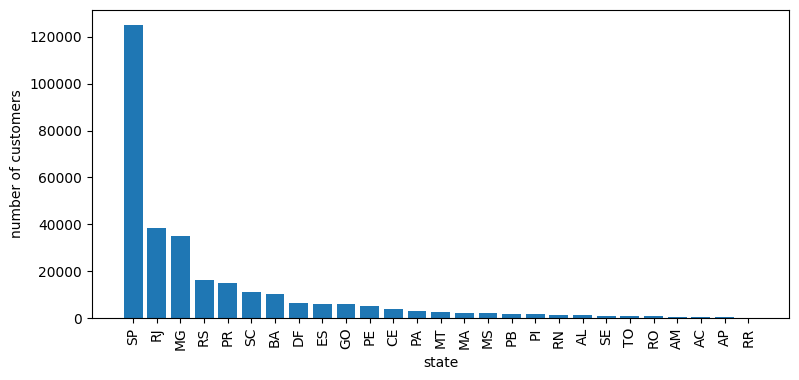

In [11]:
query = """ select customer_state, count(customer_id) from customers group by customer_state """

# sorted count of customers in desc order  
# query = """ select customer_state, count(customer_id) from customers group by customer_state order by count(customer_id) desc """


cur.execute(query)

data = cur.fetchall()

data

df = pd.DataFrame(data, columns=['state','number of customers'])
df

df = df.sort_values(by='number of customers', ascending=False)

plt.figure(figsize=(9,4))

plt.bar(df['state'], df['number of customers'])
plt.xticks(rotation = 90)
plt.xlabel('state')
plt.ylabel('number of customers')
plt.show()

### 6. Calculate the number of orders per month in 2018.

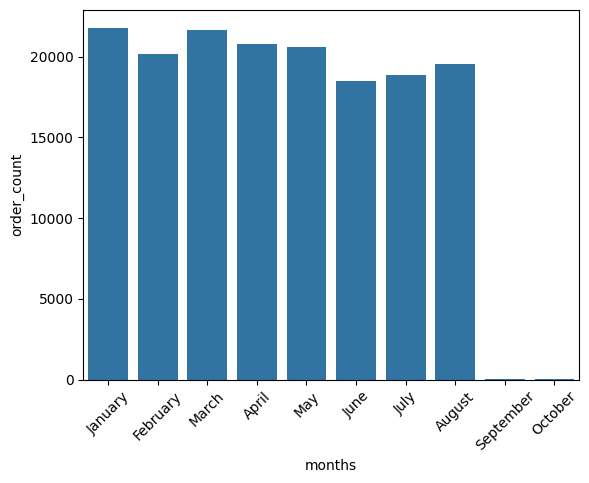

In [12]:
query = """ select MONTHNAME(order_purchase_timestamp) months, COUNT(order_id) order_count from orders
            where YEAR(order_purchase_timestamp) = 2018
            group by months"""

cur.execute(query)

data = cur.fetchall()

data

df = pd.DataFrame(data, columns=['months','order_count'])
o = ['January','February','March','April','May','June','July','August','September','October']

sns.barplot(x=df['months'],y= df['order_count'],data=df, order=o)
plt.xticks(rotation=45)
plt.show()

### 7. Find the average number of products per order, grouped by customer city.

In [13]:
query = """ with count_per_order as (select orders.order_id, orders.customer_id, count(order_items.order_id) oc from orders join order_items on orders.order_id=order_items.order_id group by orders.order_id, orders.customer_id)
            select customers.customer_city, avg(count_per_order.oc) from customers join count_per_order on customers.customer_id=count_per_order.customer_id group by customers.customer_city
    
"""

cur.execute(query)

data = cur.fetchall()
data

[('sao paulo', Decimal('10.4059')),
 ('sao jose dos campos', Decimal('10.2464')),
 ('porto alegre', Decimal('10.5743')),
 ('indaial', Decimal('10.0385')),
 ('treze tilias', Decimal('11.4545')),
 ('rio de janeiro', Decimal('10.3209')),
 ('mario campos', Decimal('12.0000')),
 ('guariba', Decimal('9.0000')),
 ('cuiaba', Decimal('10.7782')),
 ('franca', Decimal('11.2642')),
 ('tocos', Decimal('9.0000')),
 ('januaria', Decimal('10.6364')),
 ('campinas', Decimal('10.4171')),
 ('embu-guacu', Decimal('11.1522')),
 ('cerquilho', Decimal('10.5000')),
 ('belo horizonte', Decimal('10.2895')),
 ('taubate', Decimal('10.2135')),
 ('arcos', Decimal('10.0800')),
 ('monte mor', Decimal('9.6923')),
 ('vianopolis', Decimal('12.0000')),
 ('cacapava', Decimal('10.4595')),
 ('sao jose da tapera', Decimal('9.0000')),
 ('belford roxo', Decimal('9.8108')),
 ('pedro leopoldo', Decimal('11.2500')),
 ('arroio do sal', Decimal('11.5714')),
 ('sao bernardo do campo', Decimal('10.2802')),
 ('brasilia', Decimal('10.17

###  8.Calculate the percentage of total revenue contributed by each product category.

In [14]:
query = """ select upper(products.product_category),100*(sum(order_items.price)/(select sum(price) from order_items)) 
            from products join order_items on products.product_id=order_items.product_id 
            group by products.product_category
"""

cur.execute(query)

data = cur.fetchall()
data

[('HEALTH BEAUTY', 27.78209983852079),
 ('SPORT LEISURE', 21.808597780506293),
 ('COOL STUFF', 14.02238461305213),
 ('COMPUTER ACCESSORIES', 20.129007296065062),
 ('WATCHES PRESENT', 26.5973499010316),
 ('HOUSEWARES', 13.955236204224338),
 ('ELECTRONICS', 3.537027814847106),
 (None, 3.9627719128299757),
 ('TOYS', 10.681855949333457),
 ('BED TABLE BATH', 22.888813953480874),
 ('GAMES CONSOLES', 3.4756330550667327),
 ('AUTOMOTIVE', 13.082746804938356),
 ('FURNITURE DECORATION', 16.10759908760372),
 ('HOME APPLIANCES', 1.7695769243619601),
 ('TELEPHONY', 7.144114497757571),
 ('CONSTRUCTION TOOLS CONSTRUCTION', 3.193379543688247),
 ('PERFUMERY', 8.809637980721053),
 ('STATIONARY STORE', 5.097468009193997),
 ('ROOM FURNITURE', 1.521152879167135),
 ('FASHION BAGS AND ACCESSORIES', 3.3731801044621963),
 ('GARDEN TOOLS', 10.710767718937952),
 ('FASHION UNDERWEAR AND BEACH FASHION', 0.21060477257124174),
 ('PET SHOP', 4.730452359024788),
 ('SIGNALIZATION AND SAFETY', 0.4747600193447927),
 ('ELE

### 9. Identify the correlation between product price and the number of times a product has been purchased.

In [15]:
import numpy as np
query = """ select upper(products.product_category),count(products.product_id), avg(order_items.price)
            from products join order_items on products.product_id=order_items.product_id 
            group by products.product_category"""

cur.execute(query)

data = cur.fetchall()
data

df = pd.DataFrame(data, columns=['category','count','price'])
arr1 = df['count']
arr2 = df['price']

np.corrcoef([arr1,arr2])

array([[ 1.        , -0.10631552],
       [-0.10631552,  1.        ]])


### 10.Calculate the total revenue generated by each seller, and rank them by revenue.


In [16]:
query = """ select *, dense_rank() over (order by revenue desc) rn from
            (select order_items.seller_id, sum(payments.payment_value) revenue
            from order_items join payments
            on order_items.order_id = payments.order_id
            group by order_items.seller_id) a"""

cur.execute(query)

data = cur.fetchall()
data

[('7c67e1448b00f6e969d365cea6b010ab', 4564502.165719271, 1),
 ('1025f0e2d44d7041d6cf58b6550e0bfa', 2773998.3585619926, 2),
 ('4a3ca9315b744ce9f8e9374361493884', 2711207.4278875887, 3),
 ('1f50f920176fa81dab994f9023523100', 2612280.781148538, 4),
 ('53243585a1d6dc2643021fd1853d8905', 2564127.7244796753, 5),
 ('da8622b14eb17ae2831f4ac5b9dab84a', 2449973.873831928, 6),
 ('4869f7a5dfa277a7dca6462dcf3b52b2', 2377495.0884490013, 7),
 ('955fee9216a65b617aa5c0531780ce60', 2126900.704520384, 8),
 ('fa1c13f2614d7b5c4749cbc52fecda94', 1858619.0688285828, 9),
 ('7e93a43ef30c4f03f38b393420bc753a', 1666207.8873567581, 10),
 ('6560211a19b47992c3666cc44a7e94c0', 1616919.741435036, 11),
 ('7a67c85e85bb2ce8582c35f2203ad736', 1521277.200230509, 12),
 ('25c5c91f63607446a97b143d2d535d31', 1444812.657953024, 13),
 ('a1043bafd471dff536d0c462352beb48', 1389212.1917023659, 14),
 ('46dc3b2cc0980fb8ec44634e21d2718e', 1339779.0606365204, 15),
 ('b37c4c02bda3161a7546a4e6d222d5b2', 1307871.361175537, 16),
 ('620c87

## Identify the top 3 customers who spent the most money in each year.

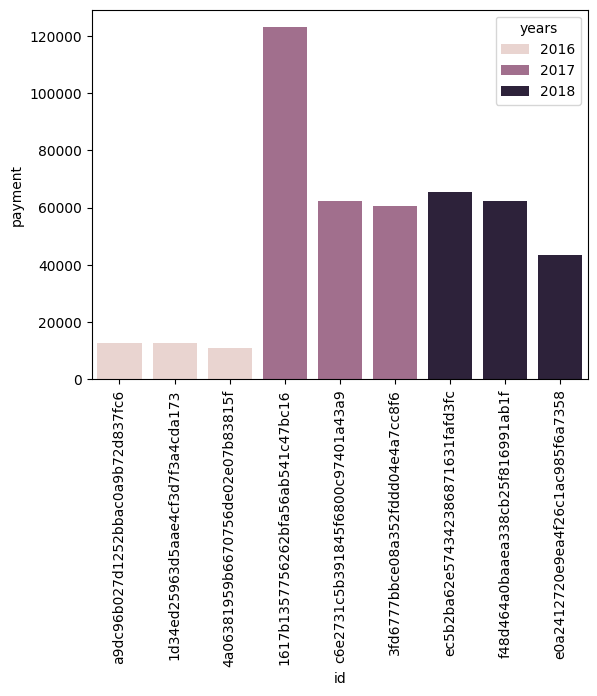

In [24]:
query = """ select * from (select year(orders.order_purchase_timestamp) years, orders.customer_id, sum(payments.payment_value) payment,
            dense_rank() over (partition by year(orders.order_purchase_timestamp) order by sum(payments.payment_value) desc) d_rank
            from orders join payments
            on orders.order_id = payments.order_id
            group by year(orders.order_purchase_timestamp), orders.customer_id) a
            where d_rank <= 3;
            """

cur.execute(query)

data = cur.fetchall()
data

df = pd.DataFrame(data, columns=['years','id','payment','rank'])
df

sns.barplot(x='id', y='payment', data=df, hue = 'years')
plt.xticks(rotation=90)
plt.show()